In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


In [6]:
df =df.drop(columns=['User ID'])

In [7]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [9]:
df.isnull().sum().sum()

0

In [12]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

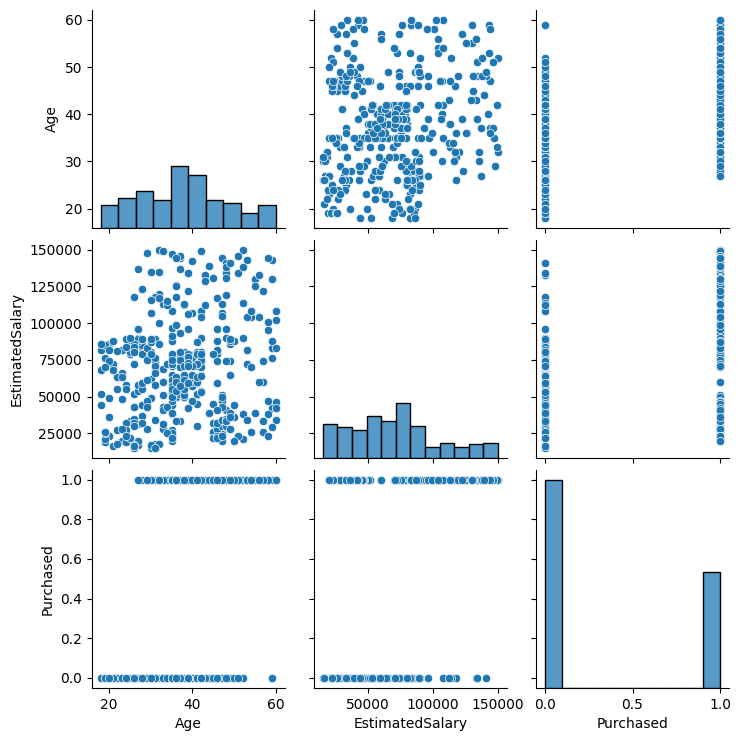

In [18]:
sns.pairplot(df)
plt.show()

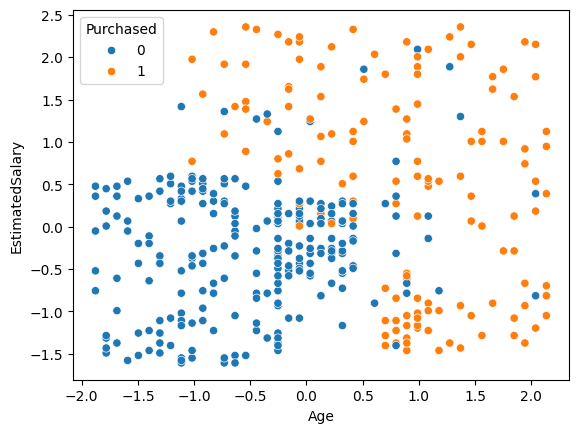

In [58]:
sns.scatterplot(x='Age', y='EstimatedSalary',data=df , hue='Purchased')
plt.show()

In [34]:
x= df.iloc[:,:-1]
y=df['Purchased']

In [30]:
from sklearn.preprocessing import StandardScaler
SS= StandardScaler()

In [35]:
df[['Age','EstimatedSalary']]= SS.fit_transform(df[['Age','EstimatedSalary']])

In [36]:
df.head()

,Age,EstimatedSalary,Purchased
0,-1.781797,-1.490046,0
1,-0.253587,-1.460681,0
2,-1.113206,-0.785290,0
3,-1.017692,-0.374182,0
4,-1.781797,0.183751,0


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(criterion='entropy')

In [74]:
dt2 = DecisionTreeClassifier(max_depth=2)  # pre pruning

In [40]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [75]:
dt2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [42]:
dt.score(x_test,y_test)*100

90.0

In [55]:
dt1.score(x_test,y_test)*100

90.0

In [66]:
dt2.score(x_test,y_test)*100

95.0

In [45]:
dt.predict([[47,49000]])

array([1])

In [ ]:
# how data is splitted

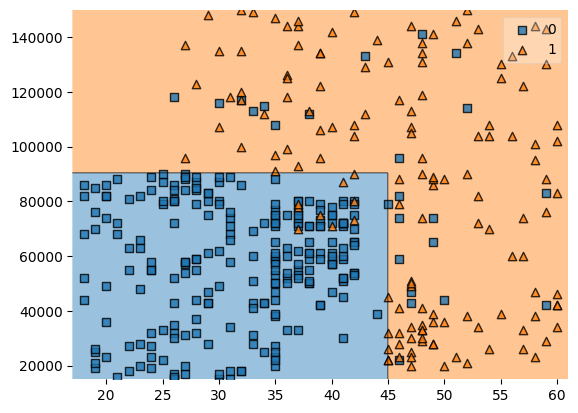

In [76]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt2)
plt.show()

In [46]:
# how my Decison tree work

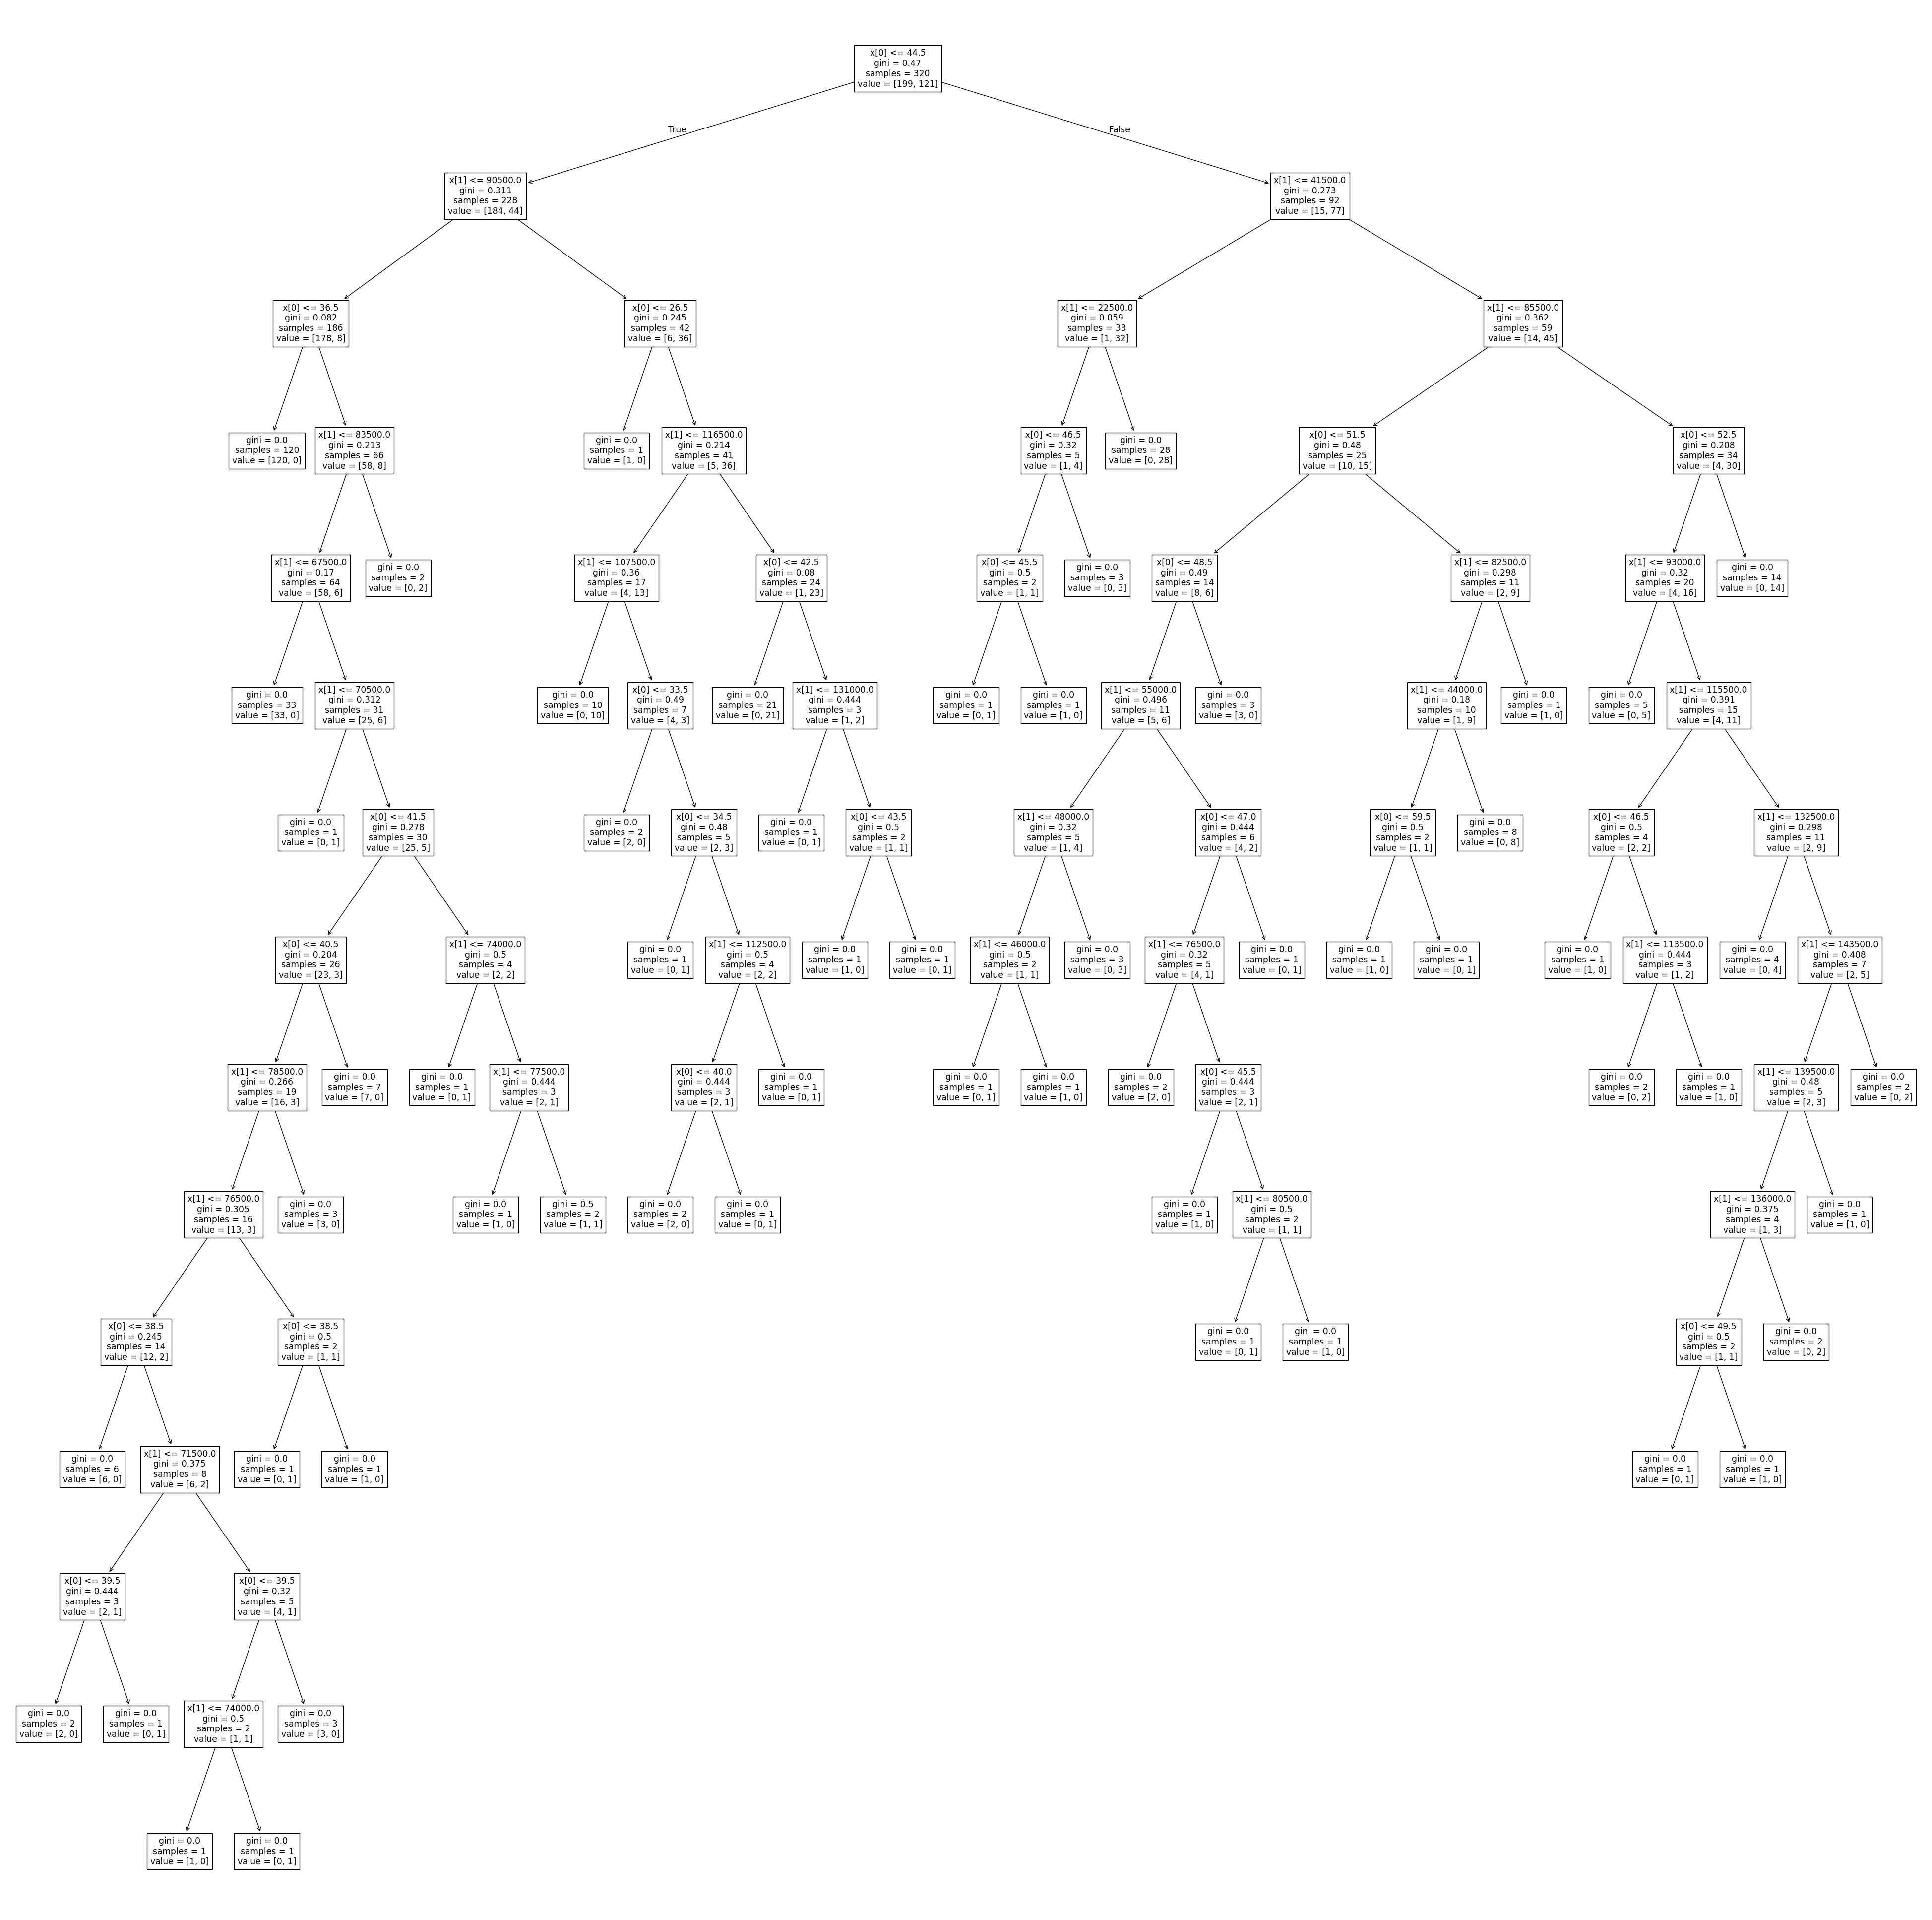

In [52]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig("Demo.jpg")
plt.show()

In [68]:
# post pruning

In [73]:
for i in range(1,25):
  dt2= DecisionTreeClassifier()
  dt2.fit(x_train,y_train)
  print(f"{i} {dt2.score(x_train,y_train)*100, dt2.score(x_test,y_test)*100}")

1 (99.6875, 91.25)
2 (99.6875, 91.25)
3 (99.6875, 91.25)
4 (99.6875, 90.0)
5 (99.6875, 91.25)
6 (99.6875, 91.25)
7 (99.6875, 91.25)
8 (99.6875, 91.25)
9 (99.6875, 91.25)
10 (99.6875, 90.0)
11 (99.6875, 91.25)
12 (99.6875, 90.0)
13 (99.6875, 91.25)
14 (99.6875, 91.25)
15 (99.6875, 91.25)
16 (99.6875, 90.0)
17 (99.6875, 91.25)
18 (99.6875, 91.25)
19 (99.6875, 88.75)
20 (99.6875, 90.0)
21 (99.6875, 91.25)
22 (99.6875, 91.25)
23 (99.6875, 91.25)
24 (99.6875, 90.0)
